## Titanic ML

### Data Understanding and Cleaning

Import the required python libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

Read the data into data frame

In [2]:
train_df = pd.read_csv('train.csv', encoding='ISO-8859-1')
test_df = pd.read_csv('test.csv', encoding='ISO-8859-1')

In [3]:
print('Train : ',train_df.shape)
print('Test : ',test_df.shape)

Train :  (891, 12)
Test :  (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df['PassengerId'].nunique()

418

##### We can see that all the values of mobile_number column are unique

In [6]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

##### We can see that we have some columns with missing values.

In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


#### Let us treat the missing values

In [9]:
# Check the ratio of nulls in the columns and order the columns by null values percentage.
print(round(100*(train_df.isnull().sum()/len(train_df.index))).sort_values())

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
Age            20.0
Cabin          77.0
dtype: float64


In [10]:
print(round(100*(test_df.isnull().sum()/len(test_df.index))).sort_values())

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
Age            21.0
Cabin          78.0
dtype: float64


In [11]:
# Impute missing age values with median of age
age_median = train_df['Age'].median()
train_df = train_df.fillna({'Age':age_median})
test_df = test_df.fillna({'Age':age_median})

In [12]:
# Impute missing Cabin values with X ( for Unknown)
train_df = train_df.fillna({'Cabin':'X'})
test_df = test_df.fillna({'Cabin':'X'})

In [13]:
def get_title(name):
    temp = str.split(name,',')[1]
    res = str.split(temp,'.')[0]
    return res
train_df['Title'] = train_df['Name'].apply(lambda x:get_title(x))
test_df['Title'] = test_df['Name'].apply(lambda x:get_title(x))

### Exploratory Data Analysis using Bivariate

<AxesSubplot:title={'center':'Survival by Title'}, xlabel='Title', ylabel='Survived'>

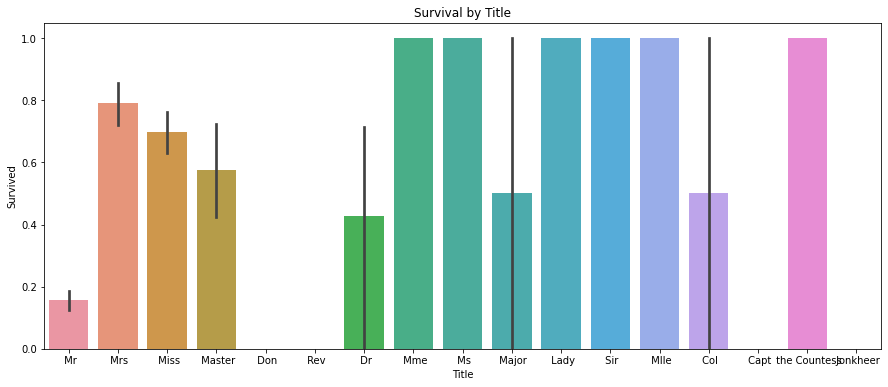

In [14]:
plt.figure(figsize=(15,6))
plt.title('Survival by Title')
sns.barplot(train_df['Title'], train_df['Survived'])

#### Survival rate was high for females and also ones with Knighthood

<AxesSubplot:title={'center':'Survival by Sex'}, xlabel='Sex', ylabel='Survived'>

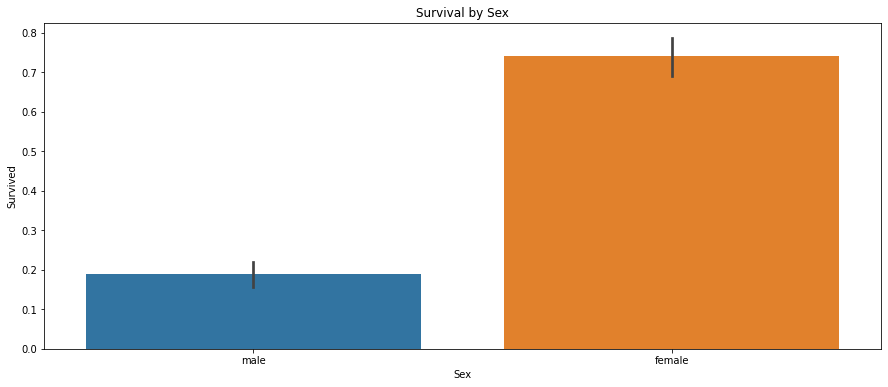

In [15]:
plt.figure(figsize=(15,6))
plt.title('Survival by Sex')
sns.barplot(train_df['Sex'], train_df['Survived'])

#### Survival rate was indeed high for females

<AxesSubplot:title={'center':'Survival by Age'}, xlabel='Age', ylabel='Survived'>

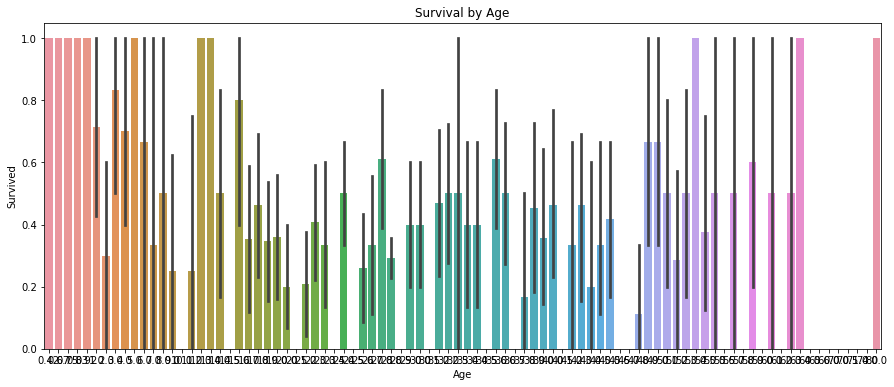

In [16]:
plt.figure(figsize=(15,6))
plt.title('Survival by Age')
sns.barplot(train_df['Age'], train_df['Survived'])

#### We can see survival rate was high for younger ones.  Let us group in to different age bands and check once again

In [17]:
def age_group(age):
    group = ''
    if (0 <= age <= 3):
        group = 0  # Child
    elif (4 <= age <= 15):
        group = 1  # Schooling
    elif (16 <= age <= 40):
        group = 2  # young
    elif (41 <= age <= 60):
        group = 3  # Still active
    else:
        group = 4  # Old age
    return group
train_df['Age_Group'] = train_df['Age'].apply(lambda x:age_group(x))
test_df['Age_Group'] = test_df['Age'].apply(lambda x:age_group(x))
# Drop the Age fields after creating Age_Group
train_df = train_df.drop(['Age'],axis=1)
test_df = test_df.drop(['Age'],axis=1)

<AxesSubplot:title={'center':'Survival by Age Group'}, xlabel='Age_Group', ylabel='Survived'>

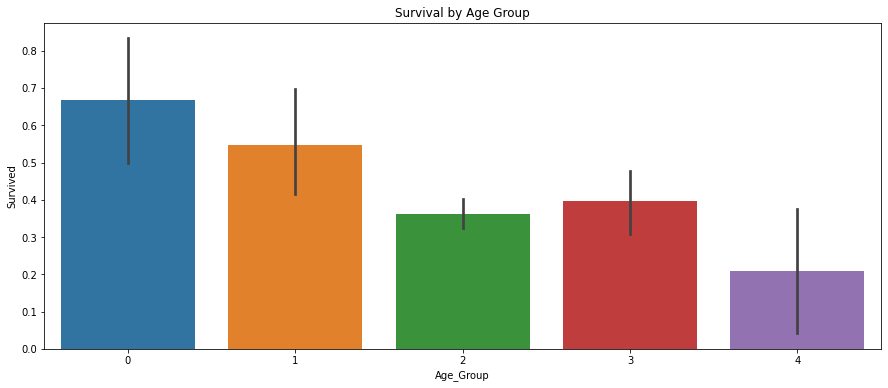

In [18]:
plt.figure(figsize=(15,6))
plt.title('Survival by Age Group')
sns.barplot(train_df['Age_Group'], train_df['Survived'])

#### Survival rate was higher for infants, babies and school age children

<AxesSubplot:title={'center':'Survival by Passenger Class'}, xlabel='Pclass', ylabel='Survived'>

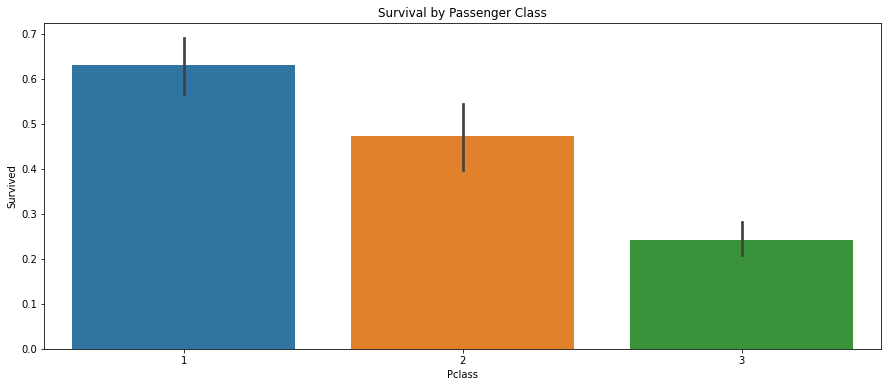

In [19]:
plt.figure(figsize=(15,6))
plt.title('Survival by Passenger Class')
sns.barplot(train_df['Pclass'], train_df['Survived'])

#### Survival rate was higher for Higher class passengers and lower for Lower class passengers

<AxesSubplot:title={'center':'Survival by Embarked station'}, xlabel='Embarked', ylabel='Survived'>

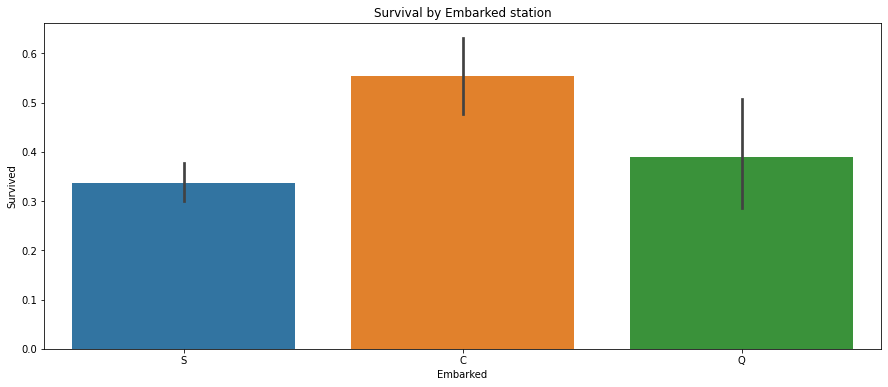

In [20]:
plt.figure(figsize=(15,6))
plt.title('Survival by Embarked station')
sns.barplot(train_df['Embarked'], train_df['Survived'])

#### Survival rate was more than 50% for passengers embarked at Cherbourg in France where as for other stations it's way less than 40%

<AxesSubplot:title={'center':'Survival by Siblings/Spouse on board'}, xlabel='SibSp', ylabel='Survived'>

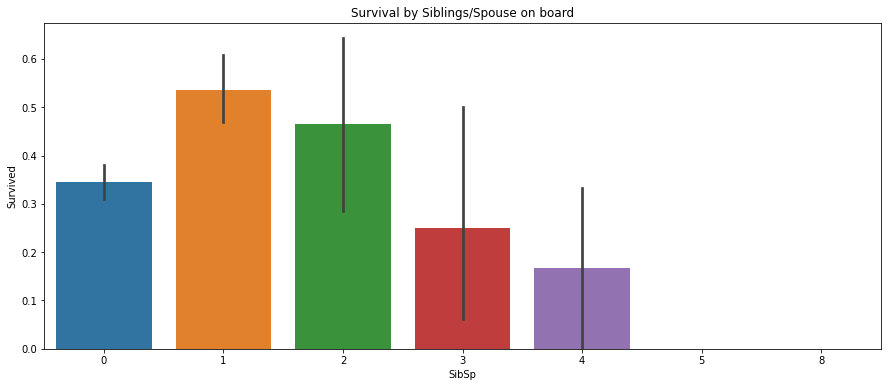

In [21]:
plt.figure(figsize=(15,6))
plt.title('Survival by Siblings/Spouse on board')
sns.barplot(train_df['SibSp'], train_df['Survived'])

#### With one or two Siblings or Spouse on board the Survival rate was higher

<AxesSubplot:title={'center':'Survival by Parents/Children'}, xlabel='Parch', ylabel='Survived'>

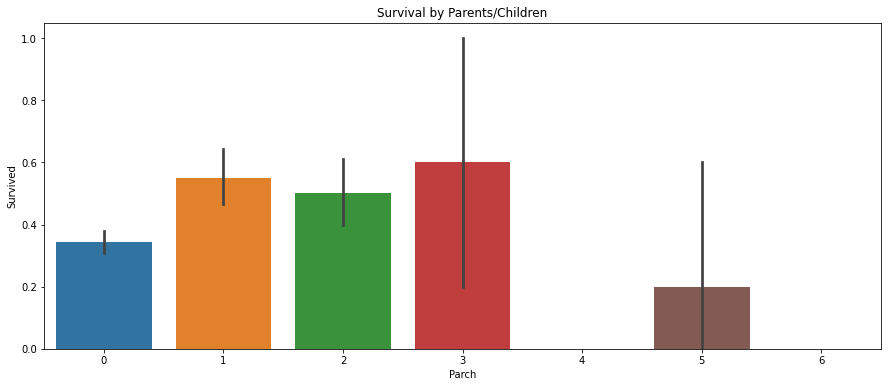

In [22]:
plt.figure(figsize=(15,6))
plt.title('Survival by Parents/Children')
sns.barplot(train_df['Parch'], train_df['Survived'])

#### Survival rate was higher with Parents or Children on board 

### Let us encode all the categorical columns 

In [23]:
# In the test data set we have Dona for title, and in train we have Don, Let us make it same and encode
def enc_title(title):
    res = 0
    if title == ' Mr':
        res = 0
    elif title == ' Mrs':
        res = 1
    elif title ==  ' Miss':
        res = 2
    elif title ==  ' Master':
        res = 3
    elif title == ' Ms':
        res = 4
    elif title == ' Col':
        res = 5
    elif title == ' Rev':
        res = 6
    elif title == ' Dr':
        res = 7
    elif (title == ' Dona' or title == 'Don'):
        res = 8
    elif title == ' Mme':
        res = 9
    elif title == ' Major':
        res = 10
    elif title == ' Lady':
        res = 11
    elif title == ' Sir':
        res = 12
    elif title == ' Mlle':
        res = 13
    elif title == ' Capt':
        res = 14
    elif title == ' the Countess':
        res = 15
    elif title == ' Jonkheer':
        res = 16
    return res 
train_df['Title'] = train_df['Title'].apply(lambda x:enc_title(x))
test_df['Title'] = test_df['Title'].apply(lambda x:enc_title(x))

In [24]:
train_df = train_df.drop(['Name','Ticket'],axis=1)
test_df = test_df.drop(['Name', 'Ticket'],axis=1)

In [25]:
train_df['Sex'] = train_df['Sex'].apply(lambda x:1 if x == 'male' else 0)
test_df['Sex'] = test_df['Sex'].apply(lambda x:1 if x == 'male' else 0)

In [26]:
def get_embarked(cab):
    group = ''
    if cab == 'S':
        group = 0  
    elif cab == 'C':
        group = 1  
    elif cab == 'Q':
        group = 2  
    else:
        group = 3  # Unknown
    return group
train_df['Embarked'] = train_df['Embarked'].apply(lambda x:get_embarked(x))
test_df['Embarked'] = test_df['Embarked'].apply(lambda x:get_embarked(x))

In [27]:
def get_cabin(cab):
    if cab[0] == 'X':
        res = 0
    elif cab[0] == 'C':
        res = 1
    elif cab[0] == 'E':
        res = 2
    elif cab[0] == 'G':
        res = 3
    elif cab[0] == 'D':
        res = 4
    elif cab[0] == 'A':
        res = 5
    elif cab[0] == 'B':
        res = 6
    elif cab[0] == 'F':
        res = 7
    else:
        res = 8 
    return res
train_df['Cabin'] = train_df['Cabin'].apply(lambda x:get_cabin(x))
test_df['Cabin'] = test_df['Cabin'].apply(lambda x:get_cabin(x))

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Group
0,1,0,3,1,1,0,7.2500,0,0,0,2
1,2,1,1,0,1,0,71.2833,1,1,1,2
2,3,1,3,0,0,0,7.9250,0,0,2,2
3,4,1,1,0,1,0,53.1000,1,0,1,2
4,5,0,3,1,0,0,8.0500,0,0,0,2


In [29]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Title', 'Age_Group'],
      dtype='object')

#### Split the X and Y data sets

In [30]:
X_test = test_df
y_train = train_df['Survived']
X_train = train_df[X_test.columns]

In [31]:
X_test = X_test.fillna({'Fare':X_test['Fare'].median()})
X_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Age_Group      0
dtype: int64

In [32]:
# Separate the passenger Id's for creating predictions
X_train_passenger = X_train['PassengerId']
X_test_passenger = X_test['PassengerId']
X_train = X_train.drop(['PassengerId'],axis=1)
X_test = X_test.drop(['PassengerId'],axis=1)

In [33]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Group
0,3,1,1,0,7.2500,0,0,0,2
1,1,0,1,0,71.2833,1,1,1,2
2,3,0,0,0,7.9250,0,0,2,2
3,1,0,1,0,53.1000,1,0,1,2
4,3,1,0,0,8.0500,0,0,0,2


In [34]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Group
0,3,1,0,0,7.8292,0,2,0,2
1,3,0,1,0,7.0000,0,0,1,3
2,2,1,0,0,9.6875,0,2,0,4
3,3,1,0,0,8.6625,0,0,0,2
4,3,0,1,1,12.2875,0,0,1,2


#### Split train data into train and validation sets

In [54]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Now let us run the Logistic Regression and find the accuracy

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [55]:
import statsmodels.api as sms

train_lm_X = train_X
valid_lm_X = valid_X

train_sm_X = sms.add_constant(train_lm_X)
logml = sms.GLM(train_y,train_sm_X, family = sms.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  801
Model:                            GLM   Df Residuals:                      791
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.10
Date:                Tue, 27 Oct 2020   Deviance:                       700.21
Time:                        11:43:47   Pearson chi2:                     831.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8012      0.655      7.328      0.000       3.517       6.085
Pclass        -0.9222      0.162     -5.705      0.000      -1.239      -0.605
Sex           -2.6099      0.221    -11.817      0.000      -3.043      -2.177
SibSp         -0.4132      0.118     -3.488      0.000      -0.645      -0.181
Parch         -0.1401      0.125     -1.125      0.261      -0.384       0.104
Fare           0.0025      0.003      0.958      0.338      -0.003       0.007
Cabin          0.0853      0.061      1.400      0.162      -0.034       0.205
Embarked       0.1503      0.152      0.991      0.322      -0.147       0.447
Title          0.1384      0.062      2.228      0.026       0.017       0.260
Age_Group     -0.8061      0.157     -5.131      0.000      -1.114      -0.498
==============================================================================
"""

In [56]:
y_train_pred = res.predict(train_sm_X)
y_train_pred[:10]

165    0.232199
541    0.413182
625    0.177347
388    0.133766
76     0.102647
281    0.102638
712    0.206016
338    0.048620
327    0.864865
321    0.102647
dtype: float64

In [57]:
y_train_pred_final = pd.DataFrame({'Survived':train_y, 'Survived_Prob':y_train_pred})
y_train_pred_final.head()

,Survived,Survived_Prob
165,1,0.232199
541,0,0.413182
625,0,0.177347
388,0,0.133766
76,0,0.102647


#### Now, let us look at the ROC Curve to find out optimal cut-off probability

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, 
                                          y_train_pred_final.Survived_Prob, drop_intermediate = False )

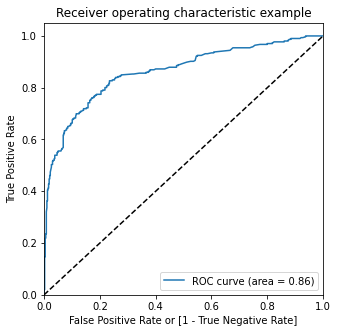

In [60]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.  

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
165,1,0.232199,1,1,1,0,0,0,0,0,0,0
541,0,0.413182,1,1,1,1,1,0,0,0,0,0
625,0,0.177347,1,1,0,0,0,0,0,0,0,0
388,0,0.133766,1,1,0,0,0,0,0,0,0,0
76,0,0.102647,1,1,0,0,0,0,0,0,0,0


In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382022  1.000000  0.000000
0.1   0.1  0.480649  0.977124  0.173737
0.2   0.2  0.717853  0.859477  0.630303
0.3   0.3  0.787765  0.807190  0.775758
0.4   0.4  0.789014  0.774510  0.797980
0.5   0.5  0.800250  0.718954  0.850505
0.6   0.6  0.812734  0.640523  0.919192
0.7   0.7  0.796504  0.529412  0.961616
0.8   0.8  0.762797  0.398693  0.987879
0.9   0.9  0.699126  0.218954  0.995960


#### At probability 0.4, we see all metrics accuracy, sensitivity and specificity are approximately around 80%
##### Let's plot accuracy sensitivity and specificity for various probabilities.

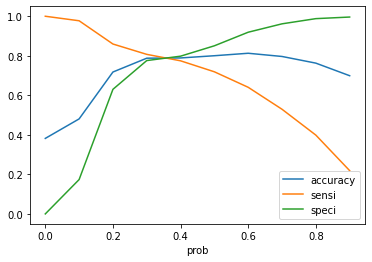

In [63]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Survived,Survived_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
165,1,0.232199,1,1,1,0,0,0,0,0,0,0,0
541,0,0.413182,1,1,1,1,1,0,0,0,0,0,1
625,0,0.177347,1,1,0,0,0,0,0,0,0,0,0
388,0,0.133766,1,1,0,0,0,0,0,0,0,0,0
76,0,0.102647,1,1,0,0,0,0,0,0,0,0,0


### Let us model using RandomForests

In [76]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import time

# Let us use gini criterion as it is comparatively faster than entropy.
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(4,6),
    'min_samples_leaf': range(4,20, 4),
    'min_samples_split': range(10, 50, 10),
    'n_estimators': [100,200,300,400], 
    'max_features': range(4,6)
}
# Create a based model
rf = RandomForestClassifier(bootstrap=True, criterion="gini")

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= scoring_set, refit='F1',
                          cv = 5, n_jobs = -1,verbose = 1)
# train_X, valid_X, train_y, valid_y

In [77]:
# Fit the grid search to the data   #. Runs for approximately one hour duration
start = time.time()
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  6.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(4, 6), 'max_features': range(4, 6),
                         'min_samples_leaf': range(4, 20, 4),
                         'min_samples_split': range(10, 50, 10),
                         'n_estimators': [100, 200, 300, 400]},
             refit='F1',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score)},
             verbose=1)

In [78]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7665204525111844 using {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 300}


#### Now let us model with the best parameters obtained from grid search using RandomForests

In [80]:
rfc = RandomForestClassifier(bootstrap=True, 
                             criterion="gini",
                             max_depth=5,
                             max_features=4,
                             min_samples_leaf=4, 
                             min_samples_split=20,
                             n_estimators=300)

# fit
rfc.fit(train_X,train_y)

# predict
predictions_train = rfc.predict(train_X)

predictions_valid = rfc.predict(valid_X)
time_taken = time.time() - start

In [81]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

print('Train confusion matrix : \n',confusion_matrix(train_y,predictions_train))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,predictions_valid))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,predictions_train),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,predictions_valid),2))

Train confusion matrix : 
 [[456  39]
 [ 78 228]]
Valid confusion matrix : 
 [[46  8]
 [ 6 30]]
Train accuracy :  0.85
Valid accuracy :  0.84


In [82]:
predictions_test = rfc.predict(X_test)
out_df = pd.concat([X_test_passenger, pd.DataFrame(predictions_test)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('randomforests.csv', index=False) # Score 78.23. Board position 3799  

### Linear SVC Classifier

In [199]:
from sklearn.svm import LinearSVC
X_train_linsvc = train_X
X_valid_linsvc = valid_X

In [200]:
param_grid = {
    'penalty': ['l1','l2'],
    'loss': ['hinge','squared_hinge'],
    'C': range(1, 10)
}

# Create a based model
svc = LinearSVC(random_state=42)

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, scoring= scoring_set, refit='Accuracy',
                          cv = 5, n_jobs = -1,verbose = 1)

In [201]:
# Fit the grid search to the data   
start = time.time()
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.1s finished


GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': range(1, 10), 'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             refit='Accuracy',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score)},
             verbose=1)

In [202]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7877717391304347 using {'C': 4, 'loss': 'hinge', 'penalty': 'l2'}


In [203]:
svc_final = LinearSVC(C=4, loss='hinge', penalty='l2', random_state=42)

# fit
svc_final.fit(train_X,train_y)

# predict
predictions_train = svc_final.predict(train_X)

predictions_valid = svc_final.predict(valid_X)
time_taken = time.time() - start

In [204]:
print('Train confusion matrix : \n',confusion_matrix(train_y,predictions_train))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,predictions_valid))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,predictions_train),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,predictions_valid),2))

Train confusion matrix : 
 [[411  84]
 [ 88 218]]
Valid confusion matrix : 
 [[43 11]
 [ 7 29]]
Train accuracy :  0.79
Valid accuracy :  0.8


### Now let us model using StackingClassifier

In [205]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train_stack = train_X
X_valid_stack = valid_X

# parameter grid
param_grid = {
              "stack_method": ['auto', 'predict_proba', 'decision_function', 'predict'],
             }

estimators = [
    ('rf', RandomForestClassifier(bootstrap=True, criterion="gini",max_depth=5,max_features=4,
                             min_samples_leaf=4, min_samples_split=20,n_estimators=300)),
    ('xgb', XGBClassifier(min_child_weight = 0.7, max_depth = 8, learning_rate = 0.7, gamma = 0.8, 
                       colsample_bytree = 0.5)),
    ('gbc', GradientBoostingClassifier(n_estimators=1500, min_samples_split=150, min_samples_leaf=150,
                                       max_features=3, max_depth=12,
                                       loss='deviance', learning_rate=0.7, random_state=42)),
    ('ridge', RidgeClassifier(alpha=10, solver='lsqr', random_state=42))
]
    
stack = StackingClassifier(passthrough=False, cv=5,
                           estimators=estimators, final_estimator=LogisticRegression())

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# run grid search
folds = 5
grid_search_bag = GridSearchCV(stack, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = scoring_set,
                               refit = 'Accuracy',
                               return_train_score=True,
                               n_jobs = -1,
                               verbose = 1)

In [206]:
# fit   # Runs for approximately one hour duration
start = time.time()
grid_search_bag.fit(X_train_stack, train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   43.4s finished


GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('rf',
                                                       RandomForestClassifier(max_depth=5,
                                                                              max_features=4,
                                                                              min_samples_leaf=4,
                                                                              min_samples_split=20,
                                                                              n_estimators=300)),
                                                      ('xgb',
                                                       XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     colsample_bylevel=None,
                                                                   

In [207]:
print('\n All results:')
print(grid_search_bag.cv_results_)
print('\n Best estimator:')
print(grid_search_bag.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(grid_search_bag.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search_bag.best_params_)
results = pd.DataFrame(grid_search_bag.cv_results_)


 All results:
{'mean_fit_time': array([12.67520008,  2.07000704,  2.14283562, 13.18910956]), 'std_fit_time': array([0.14490458, 0.019576  , 0.02485744, 2.20338696]), 'mean_score_time': array([0.07578607, 0.        , 0.        , 0.0939271 ]), 'std_score_time': array([0.00426171, 0.        , 0.        , 0.06411877]), 'param_stack_method': masked_array(data=['auto', 'predict_proba', 'decision_function',
                   'predict'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'stack_method': 'auto'}, {'stack_method': 'predict_proba'}, {'stack_method': 'decision_function'}, {'stack_method': 'predict'}], 'split0_test_Accuracy': array([0.83850932,        nan,        nan, 0.83850932]), 'split1_test_Accuracy': array([0.8, nan, nan, 0.8]), 'split2_test_Accuracy': array([0.88125,     nan,     nan, 0.8875 ]), 'split3_test_Accuracy': array([0.8125 ,     nan,     nan, 0.81875]), 'split4_test_Accuracy': array([0.81875,     nan,     

#### Now let us model using StackingClassifier with hyperparameters

In [228]:
estimators = estimators=[('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=4,
                                                       min_samples_leaf=4,
                                                       min_samples_split=20,
                                                       n_estimators=300)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5, gamma=0.8,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.7,
                                              scale_pos_weight=None,
                                              subsample=None, tree_method=None,
                                              validate_parameters=None,
                                              verbosity=None)),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=0.7,
                                                           max_depth=12,
                                                           max_features=3,
                                                           min_samples_leaf=150,
                                                           min_samples_split=150,
                                                           n_estimators=1500,
                                                           random_state=42)),
                               ('ridge',
                                RidgeClassifier(alpha=10, random_state=42,
                                                solver='lsqr'))]
    
stack = StackingClassifier(passthrough=False, stack_method='auto', cv=5,
                           estimators=estimators, final_estimator=XGBClassifier())

stack.fit(X_train_stack, train_y)
y_train_stack = stack.predict(X_train_stack) 
y_valid_stack = stack.predict(X_valid_stack) 
stack.score(X_valid_stack,y_valid_stack)
time_taken = time.time() - start

In [229]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_stack))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_stack))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_stack),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_stack),2))

Train confusion matrix : 
 [[463  32]
 [ 78 228]]
Valid confusion matrix : 
 [[47  7]
 [ 9 27]]
Train accuracy :  0.86
Valid accuracy :  0.82


In [227]:
y_test_stack = stack.predict(X_test) 
out_df = pd.concat([X_test_passenger, pd.DataFrame(y_test_stack)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('stacking_gbc_pass.csv', index=False) 

### Now let us model using BaggingClassifier

In [83]:
X_train_bag = train_X
X_valid_bag = valid_X

In [248]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

# parameter grid
param_grid = {"max_samples" : [750, 1000, 2000, 5000],
              "max_features" : [5, 7],
              "n_estimators": [300, 500, 1000, 2000],
             }

# base estimator
lg = RidgeClassifier(solver='lsqr', alpha=10)

bag = BaggingClassifier(
    base_estimator=lg)

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# run grid search
folds = 3
grid_search_bag = GridSearchCV(bag, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = scoring_set,
                               refit = 'Recall',
                               return_train_score=True,
                               n_jobs = -1,
                               verbose = 1)

In [249]:
# fit   
start = time.time()
grid_search_bag.fit(X_train_bag, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    3.9s finished


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RidgeClassifier(alpha=10,
                                                                        solver='lsqr')),
             n_jobs=-1,
             param_grid={'max_features': [5, 7],
                         'max_samples': [750, 1000, 2000, 5000],
                         'n_estimators': [300, 500, 1000, 2000]},
             refit='Recall', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score),
                      'Recall': make_scorer(recall_score)},
             verbose=1)

In [250]:
print('\n All results:')
print(grid_search_bag.cv_results_)
print('\n Best estimator:')
print(grid_search_bag.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(grid_search_bag.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search_bag.best_params_)
results = pd.DataFrame(grid_search_bag.cv_results_)


 All results:
{'mean_fit_time': array([0.00848826, 0.00599376, 0.00711568, 0.00537141, 0.00440796,
       0.00428764, 0.00423344, 0.00361975, 0.00473936, 0.00405097,
       0.00424401, 0.004474  , 0.00431514, 0.00447202, 0.00349037,
       0.00455777, 0.00484196, 0.00493447, 0.00463764, 0.00495005,
       0.00461833, 0.00446502, 0.00403492, 0.00468357, 0.0045646 ,
       0.00447822, 0.00438801, 0.0042185 , 0.00450826, 0.00514126,
       0.00482186, 0.00358105]), 'std_fit_time': array([3.22466295e-03, 1.34018028e-03, 1.55363428e-03, 7.92697242e-04,
       1.00298117e-03, 5.64505865e-04, 3.38435507e-04, 5.00572070e-04,
       5.84776261e-04, 3.16928219e-04, 4.02282463e-04, 1.10585849e-04,
       2.73305558e-04, 6.23083439e-05, 6.75793087e-04, 1.80034112e-04,
       4.50791189e-05, 4.68310184e-04, 1.50141922e-04, 6.65181626e-04,
       1.33493021e-04, 3.92523703e-04, 7.21171718e-04, 9.95349899e-05,
       1.37588018e-04, 1.13984197e-04, 1.60022427e-04, 7.39850981e-04,
       6.88283455e-

##### Model using BaggingClassifier with hyper parameters

In [251]:
bag = BaggingClassifier(
    base_estimator=lg,
    max_features=5,
    max_samples=750,
    n_estimators=300)

bag.fit(X_train_bag, y_train)
y_train_bag = bag.predict(X_train_bag) 
y_test_bag = bag.predict(X_test_bag) 
bag.score(X_test_bag,y_test_bag)
time_taken = time.time() - start

In [252]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_bag))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_bag),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_bag),2))

Train confusion matrix : 
 [[469  80]
 [ 97 245]]
Train accuracy :  0.8
Train recall :  0.72


In [253]:
out_df = pd.concat([X_test_passenger, pd.DataFrame(predictions_test)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('bagging.csv', index=False) 

### Now let us model with XGBoostClassifier

In [193]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

X_train_xghpt = train_X
X_valid_xghpt = valid_X

# Create the parameter grid based on the results of random search 
param_grid = {"learning_rate"    : [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00 ] ,
 "max_depth"        : [ 6, 7, 8, 10, 20, 30],
 "min_child_weight" : [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ],
 "gamma"            : [ 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.6, 0.7, 0.8 ] }

XG = XGBClassifier(n_estimators=100)

folds = 3
param_comb = 5
scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 41)

random_search = RandomizedSearchCV(XG, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set,refit='Accuracy', n_jobs=4, cv=skf.split(X_train_xghpt,train_y), 
                                   verbose=3, random_state=41)

In [194]:
start = time.time()
random_search.fit(X_train_xghpt,train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fbebcca02d0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                

In [195]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.09455673, 0.13878258, 0.16204739, 0.17776513, 0.06097841]), 'std_fit_time': array([0.00468722, 0.01789409, 0.00879706, 0.03634799, 0.00779248]), 'mean_score_time': array([0.01173266, 0.00981005, 0.00779239, 0.00436958, 0.00336973]), 'std_score_time': array([9.30377571e-04, 3.75296265e-03, 3.89172862e-03, 4.77541298e-05,
       7.65271852e-04]), 'param_min_child_weight': masked_array(data=[0.6, 0.3, 0.7, 0.3, 0.5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 30, 8, 20, 8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.6, 0.6, 0.7, 1.0, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.6, 0.3, 0.8, 0.4, 0.3],
             mask=[False, False, False, F

#### Let us run XGBClassifier with best hyper parameters

In [197]:
X_train_xgfinal = train_X
X_valid_xgfinal = valid_X

XG = XGBClassifier(min_child_weight = 0.7, max_depth = 8, learning_rate = 0.7, gamma = 0.8, 
                       colsample_bytree = 0.5)

XG.fit(X_train_xgfinal, train_y)
y_train_xgfinal = XG.predict(X_train_xgfinal) 
y_valid_xgfinal = XG.predict(X_valid_xgfinal) 
XG.score(X_valid_xgfinal,y_valid_xgfinal)
time_taken = time.time() - start

In [198]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_xgfinal))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_xgfinal))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_xgfinal),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_xgfinal),2))

Train confusion matrix : 
 [[479  16]
 [ 45 261]]
Valid confusion matrix : 
 [[43 11]
 [ 6 30]]
Train accuracy :  0.92
Valid accuracy :  0.81


In [230]:
y_test_xgfinal = XG.predict(X_test) 
out_df = pd.concat([X_test_passenger, pd.DataFrame(y_test_xgfinal)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('XBGClassifier.csv', index=False)  # Did not do better

### Now let us model using MLP Classifier

In [188]:
from sklearn.neural_network import MLPClassifier

X_train_nn = train_X
X_valid_nn = valid_X

nn = MLPClassifier(activation='identity')

# Create the parameter grid based on the results of random search 
param_grid = {"solver"    : ['sgd', 'adam'], 
              "alpha"     : [1e-10, 1e-5, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
              "learning_rate" : ['adaptive','constant', 'invscaling'],
  }

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

random_search = RandomizedSearchCV(nn, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Accuracy', n_jobs=4, cv=skf.split(X_train_nn,train_y), 
                                   verbose=3, random_state=42)

In [189]:
# fit
start = time.time()
random_search.fit(X_train_nn,train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    4.9s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fbebc817b50>,
                   estimator=MLPClassifier(activation='identity'), n_iter=5,
                   n_jobs=4,
                   param_distributions={'alpha': [1e-10, 1e-05, 0.0001, 0.001,
                                                  0.1, 1, 10, 100, 1000],
                                        'learning_rate': ['adaptive',
                                                          'constant',
                                                          'invscaling'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42, refit='Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': make_scorer(f1_score)},
                   verbose=3)

In [190]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.66421302, 0.69756873, 0.40072036, 0.52032344, 0.45937745]), 'std_fit_time': array([0.0414938 , 0.07225413, 0.10998244, 0.06786119, 0.08925663]), 'mean_score_time': array([0.01217127, 0.00710495, 0.00565871, 0.00593527, 0.00328461]), 'std_score_time': array([4.01827952e-03, 9.99738984e-04, 7.27012056e-05, 2.54378981e-04,
       4.82293004e-04]), 'param_solver': masked_array(data=['adam', 'adam', 'sgd', 'sgd', 'sgd'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=['adaptive', 'adaptive', 'adaptive', 'adaptive',
                   'constant'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_alpha': masked_array(data=[0.001, 1000, 1000, 0.0001, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'adam', 'lea

#### Now let us run MLPClassifier with hyper parameters

In [191]:
X_train_nnfinal = train_X
X_valid_nnfinal = valid_X

nn = MLPClassifier(activation='identity', solver='adam', alpha=0.001, learning_rate='adaptive')

nn.fit(X_train_nnfinal, train_y)
y_train_nnfinal = nn.predict(X_train_nnfinal) 
y_valid_nnfinal = nn.predict(X_valid_nnfinal) 
nn.score(X_valid_nnfinal,y_valid_nnfinal)
time_taken = time.time() - start

In [192]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_nnfinal))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_nnfinal))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_nnfinal),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_nnfinal),2))

Train confusion matrix : 
 [[382 113]
 [ 84 222]]
Valid confusion matrix : 
 [[39 15]
 [ 6 30]]
Train accuracy :  0.75
Valid accuracy :  0.77


In [266]:
#

### AdaBoost Classifier

In [183]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

X_train_ada = train_X
X_valid_ada = valid_X

ada = AdaBoostClassifier(n_estimators=100, random_state=42, 
                         base_estimator=RidgeClassifier(alpha=16, solver='sparse_cg'),
                         algorithm='SAMME')

# Create the parameter grid based on the results of random search 
param_grid = {
    "learning_rate"    : [0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.60],
    "n_estimators"    : [500, 1000, 1500, 2000, 2500]
  }

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(ada, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Accuracy', n_jobs=-1, cv=skf.split(X_train_ada,train_y), 
                                   verbose=3, random_state=100)

In [184]:
# fit
start = time.time()
random_search.fit(X_train_ada,train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.1s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fbebc925a50>,
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                base_estimator=RidgeClassifier(alpha=16,
                                                                               solver='sparse_cg'),
                                                n_estimators=100,
                                                random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                                          0.3, 0.4, 0.5, 0.6],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500]},
                   random_state=100, refit='Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': make_scorer(f1_score)},
         

In [185]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.50558082, 0.56307753, 0.63552332, 0.64557608, 0.15589984]), 'std_fit_time': array([0.06951629, 0.10536232, 0.29138521, 0.06500337, 0.02249701]), 'mean_score_time': array([0.01864727, 0.04017234, 0.03804167, 0.01615095, 0.00942071]), 'std_score_time': array([0.0003925 , 0.03092083, 0.01462662, 0.00335438, 0.00261126]), 'param_n_estimators': masked_array(data=[2500, 1000, 500, 500, 2500],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.25, 0.15, 0.3, 0.1, 0.5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 2500, 'learning_rate': 0.25}, {'n_estimators': 1000, 'learning_rate': 0.15}, {'n_estimators': 500, 'learning_rate': 0.3}, {'n_estimators': 500, 'learning_rate': 0.1}, {'n_estimators': 2500, 'learning_rate': 0.5}], 'split0_test_Accuracy': array([0.79026217, 0.7

#### Now let us run AdaBoostClassifier with hyper parameters

In [186]:
X_train_adafinal = train_X
X_valid_adafinal = valid_X

ada_final = AdaBoostClassifier(n_estimators=500, random_state=100, learning_rate=0.1,
                               base_estimator=RidgeClassifier(alpha=16, solver='sparse_cg'),
                               algorithm='SAMME')

ada_final.fit(X_train_adafinal, train_y)
y_train_adafinal = ada_final.predict(X_train_adafinal) 
y_valid_adafinal = ada_final.predict(X_valid_adafinal) 
ada_final.score(X_valid_adafinal,y_valid_adafinal)
time_taken = time.time() - start

In [187]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_adafinal))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_adafinal))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_adafinal),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_adafinal),2))

Train confusion matrix : 
 [[415  80]
 [ 88 218]]
Valid confusion matrix : 
 [[45  9]
 [ 6 30]]
Train accuracy :  0.79
Valid accuracy :  0.83


In [272]:
#

### Quadratic Discriminant

In [177]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train_qda = train_X
X_valid_qda = valid_X

params = {"reg_param": [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3]}

qda = QuadraticDiscriminantAnalysis()

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

grid = GridSearchCV(qda, params, scoring=scoring_set, refit='Accuracy')

start = time.time() 
grid.fit(X_train_qda, train_y)
acc = grid.score(X_train_qda, train_y)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))

[INFO] grid search accuracy: 78.90%
[INFO] grid search best parameters: {'reg_param': 0.0001}


In [178]:
X_train_qda = train_X
X_valid_qda = valid_X

qda = QuadraticDiscriminantAnalysis(reg_param=0.1)

qda.fit(X_train_qda, train_y)
y_train_qda = qda.predict(X_train_qda)
y_valid_qda = qda.predict(X_valid_qda)
time_taken = time.time() - start

In [179]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_qda))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_qda))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_qda),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_qda),2))

Train confusion matrix : 
 [[439  56]
 [137 169]]
Valid confusion matrix : 
 [[47  7]
 [11 25]]
Train accuracy :  0.76
Valid accuracy :  0.8


In [276]:
#

### Ridge Classifier

In [97]:
# from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X_train_rc = train_X
X_valid_rc = valid_X

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'alpha': [20,17,16,15,14,13,10,5,2, 1, 1e-1],
                     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

# specify model
rc = RidgeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rc, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
start = time.time()
model_cv.fit(X_train_rc, train_y) 

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 385 out of 385 | elapsed:   10.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=RidgeClassifier(),
             param_grid=[{'alpha': [20, 17, 16, 15, 14, 13, 10, 5, 2, 1, 0.1],
                          'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                     'sparse_cg', 'sag', 'saga']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [98]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006692,0.001407,0.002644,0.000113,20,auto,"{'alpha': 20, 'solver': 'auto'}",0.857143,0.73750,0.80000,...,0.800179,0.040368,34,0.796875,0.819033,0.806552,0.812793,0.801872,0.807425,0.007829
1,0.005613,0.000870,0.002736,0.000103,20,svd,"{'alpha': 20, 'solver': 'svd'}",0.857143,0.73750,0.80000,...,0.800179,0.040368,34,0.796875,0.819033,0.806552,0.812793,0.801872,0.807425,0.007829
2,0.008712,0.001513,0.004503,0.000986,20,cholesky,"{'alpha': 20, 'solver': 'cholesky'}",0.857143,0.73750,0.80000,...,0.800179,0.040368,34,0.796875,0.819033,0.806552,0.812793,0.801872,0.807425,0.007829
3,0.007021,0.001270,0.002721,0.000191,20,lsqr,"{'alpha': 20, 'solver': 'lsqr'}",0.850932,0.73750,0.79375,...,0.798936,0.039653,44,0.792188,0.826833,0.801872,0.817473,0.804992,0.808672,0.012156
4,0.009617,0.002966,0.004118,0.001085,20,sparse_cg,"{'alpha': 20, 'solver': 'sparse_cg'}",0.857143,0.73750,0.79375,...,0.801429,0.042328,5,0.796875,0.820593,0.801872,0.812793,0.803432,0.807113,0.008483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.003083,0.000027,0.001484,0.000054,0.1,cholesky,"{'alpha': 0.1, 'solver': 'cholesky'}",0.857143,0.73750,0.80000,...,0.800179,0.040368,34,0.793750,0.817473,0.798752,0.811232,0.798752,0.803992,0.008877
73,0.003613,0.000120,0.001488,0.000116,0.1,lsqr,"{'alpha': 0.1, 'solver': 'lsqr'}",0.857143,0.73125,0.79375,...,0.796429,0.042935,54,0.790625,0.823713,0.800312,0.815913,0.806552,0.807423,0.011584
74,0.003623,0.000065,0.001462,0.000028,0.1,sparse_cg,"{'alpha': 0.1, 'solver': 'sparse_cg'}",0.857143,0.73750,0.80000,...,0.801429,0.041206,5,0.793750,0.817473,0.801872,0.811232,0.798752,0.804616,0.008591
75,0.056158,0.000981,0.001650,0.000056,0.1,sag,"{'alpha': 0.1, 'solver': 'sag'}",0.739130,0.74375,0.71250,...,0.760326,0.037850,59,0.757812,0.787832,0.758190,0.773791,0.767551,0.769035,0.011151


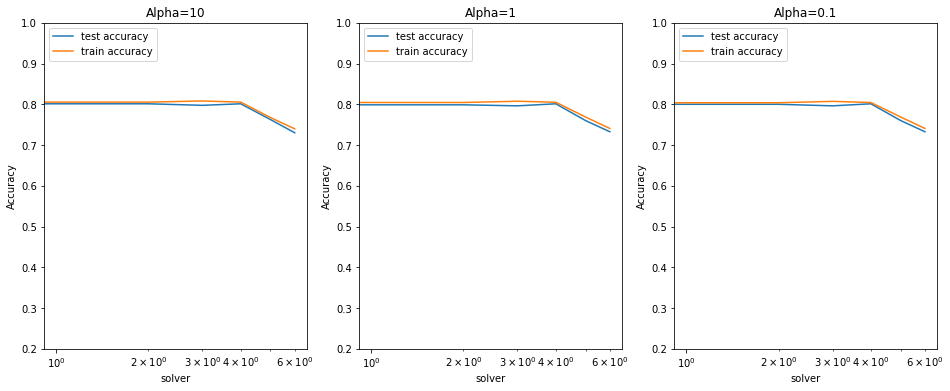

In [99]:
# # plotting
plt.figure(figsize=(16,6))
# subplot 1/4
plt.subplot(131)
alpha_01 = cv_results[cv_results['param_alpha']==10]
plt.plot(alpha_01["param_solver"], alpha_01["mean_test_score"])
plt.plot(alpha_01["param_solver"], alpha_01["mean_train_score"])
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Alpha=10")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/4
plt.subplot(132)
alpha_001 = cv_results[cv_results['param_alpha']==1]

plt.plot(alpha_001["param_solver"], alpha_001["mean_test_score"])
plt.plot(alpha_001["param_solver"], alpha_001["mean_train_score"])
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Alpha=1")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/4
plt.subplot(133)
alpha_0001 = cv_results[cv_results['param_alpha']==0.1]

plt.plot(alpha_0001["param_solver"], alpha_0001["mean_test_score"])
plt.plot(alpha_0001["param_solver"], alpha_0001["mean_train_score"])
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Alpha=0.1")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [100]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8026863354037268 corresponding to hyperparameters {'alpha': 16, 'solver': 'sparse_cg'}


#### Now let us run RidgeClassifier with hyper parameters of alpha -> 10 and solver-> lsqr

In [101]:
# specify model
rc = RidgeClassifier(alpha=16, solver='sparse_cg')     

# fit the model
rc.fit(train_X, train_y) 

RidgeClassifier(alpha=16, solver='sparse_cg')

In [102]:
y_train_rc = rc.predict(train_X)
y_valid_rc = rc.predict(valid_X)
time_taken = time.time() - start

In [103]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_rc))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_rc))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_rc),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_rc),2))

Train confusion matrix : 
 [[432  63]
 [ 90 216]]
Valid confusion matrix : 
 [[47  7]
 [ 7 29]]
Train accuracy :  0.81
Valid accuracy :  0.84


In [284]:
out_df = pd.concat([X_test_passenger, pd.DataFrame(predictions_test)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('RidgeClassifier.csv', index=False)  # Did not do better

### Let us use SGDClassifier to model

In [105]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [106]:
X_train_sgd = train_X
X_valid_sgd = valid_X

# creating a KFold object with 3 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'penalty': ['l1','l2','elasticnet'],  
                    'alpha': [0.7, 0.8, 0.9, 2.0, 5.0, 10],
                 'learning_rate': ['adaptive','optimal','constant'],
                 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
                         'squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive']}]

# specify model
model = SGDClassifier(eta0=0.08)

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= scoring_set,
                        refit='Accuracy',
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
start = time.time()
model_cv.fit(X_train_sgd, train_y)   

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1104 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed:   13.7s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SGDClassifier(eta0=0.08), n_jobs=-1,
             param_grid=[{'alpha': [0.7, 0.8, 0.9, 2.0, 5.0, 10],
                          'learning_rate': ['adaptive', 'optimal', 'constant'],
                          'loss': ['hinge', 'log', 'modified_huber',
                                   'squared_hinge', 'perceptron',
                                   'squared_loss', 'huber',
                                   'epsilon_insensitive',
                                   'squared_epsilon_insensitive'],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             refit='Accuracy', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score)},
             verbose=1)

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,split0_test_Accuracy,...,split1_test_F1,split2_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_train_F1,split1_train_F1,split2_train_F1,mean_train_F1,std_train_F1
0,0.028571,0.003322,0.007897,0.002172,0.7,adaptive,hinge,l1,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.670412,...,0.312057,0.390625,0.377084,0.048521,189,0.364964,0.362963,0.406557,0.378161,0.020096
1,0.020057,0.001810,0.011100,0.006975,0.7,adaptive,hinge,l2,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.677903,...,0.323944,0.378788,0.383816,0.051063,164,0.385965,0.379562,0.419355,0.394961,0.017446
2,0.024977,0.003898,0.008041,0.002478,0.7,adaptive,hinge,elasticnet,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.674157,...,0.323944,0.409091,0.395288,0.053515,143,0.426117,0.382353,0.420712,0.409727,0.019482
3,0.026185,0.002622,0.011931,0.007492,0.7,adaptive,log,l1,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.655431,...,0.300000,0.354839,0.344406,0.032837,265,0.329588,0.352060,0.349315,0.343654,0.010009
4,0.023850,0.007487,0.006772,0.000933,0.7,adaptive,log,l2,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.674157,...,0.312057,0.381679,0.379865,0.054640,180,0.379928,0.375000,0.420712,0.391880,0.020486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.005578,0.000121,0.005333,0.000127,10,constant,epsilon_insensitive,l2,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.610487,...,0.000000,0.512535,0.170845,0.241611,407,0.000000,0.000000,0.572193,0.190731,0.269734
482,0.008859,0.003058,0.006930,0.002949,10,constant,epsilon_insensitive,elasticnet,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.610487,...,0.000000,0.515406,0.171802,0.242965,403,0.000000,0.000000,0.578804,0.192935,0.272851
483,0.005483,0.001094,0.005291,0.000149,10,constant,squared_epsilon_insensitive,l1,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.591760,...,0.017391,0.512535,0.176642,0.237618,399,0.009434,0.000000,0.572193,0.193875,0.267538
484,0.005807,0.000170,0.009711,0.006014,10,constant,squared_epsilon_insensitive,l2,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.558052,...,0.583554,0.512535,0.569310,0.041774,23,0.585284,0.536986,0.572193,0.564821,0.020395


In [108]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7690387016229713 corresponding to hyperparameters {'alpha': 0.7, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}


#### Now let us model using tuned hyper parameters 

In [110]:
X_train_sgd = train_X
X_valid_sgd = valid_X

sgd = SGDClassifier(eta0=0.08, alpha=0.7, learning_rate='adaptive', loss='squared_hinge', 
                    penalty='l1', fit_intercept=False)

# fit the model
sgd.fit(X_train_sgd, train_y)

sgd_y_train_predict = sgd.predict(X_train_sgd)
sgd_y_valid_predict = sgd.predict(X_valid_sgd)
time_taken = time.time() - start

In [111]:
print('Train confusion matrix : \n',confusion_matrix(train_y,sgd_y_train_predict))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,sgd_y_valid_predict))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,sgd_y_train_predict),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,sgd_y_valid_predict),2))

Train confusion matrix : 
 [[425  70]
 [106 200]]
Valid confusion matrix : 
 [[43 11]
 [ 8 28]]
Train accuracy :  0.78
Valid accuracy :  0.79


In [ ]:
#

### Now let us use GradientBoostingClassifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

X_train_gbc = train_X
X_valid_gbc = valid_X

gbc = GradientBoostingClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {"loss": ["deviance", "exponential"],
              "learning_rate"    : [0.50, 0.60, 0.70, 0.80, 0.90, 1.00],
              "n_estimators"     : [1000, 1500, 1800, 2000],
              "min_samples_split": [100, 125, 150, 175, 200],
              "min_samples_leaf" : [100, 125, 150, 175, 200],
              "max_depth"        : [8, 12, 16, 20], 
              "max_features"     : [3,6,8] }

folds = 3
param_comb = 5

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(gbc, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Accuracy', n_jobs=4, cv=skf.split(X_train_gbc,train_y), 
                                   verbose=3, random_state=100)

In [123]:
# fit
start = time.time()
random_search.fit(X_train_gbc,train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   10.6s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fbed1c1fcd0>,
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5, n_jobs=4,
                   param_distributions={'learning_rate': [0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [8, 12, 16, 20],
                                        'max_features': [3, 6, 8],
                                        'min_samples_leaf': [100, 125, 150, 175,
                                                             200],
                                        'min_samples_split': [100, 125, 150,
                                                              175, 200],
                                        'n_estimators': [1000, 1500, 1800,
                                                         2000]},
           

In [124]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.80525955, 0.78642344, 1.86631838, 2.0328176 , 3.05268947]), 'std_fit_time': array([0.01800621, 0.0178488 , 0.07152338, 0.13645628, 0.18054533]), 'mean_score_time': array([0.01035976, 0.00994118, 0.0122172 , 0.014678  , 0.02913523]), 'std_score_time': array([4.80741609e-04, 8.98972596e-05, 7.12475814e-04, 4.83642808e-04,
       1.83008920e-02]), 'param_n_estimators': masked_array(data=[1000, 1000, 2000, 2000, 2000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[100, 200, 125, 200, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[150, 125, 150, 125, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[8, 3, 3, 8, 6],
             mask=[False

#### Now let us run GradientBoostingClassifier with hyper parameters 

In [127]:
X_train_gbcfinal = train_X
X_valid_gbcfinal = valid_X

gbc_final = GradientBoostingClassifier(n_estimators=1500, min_samples_split=150, min_samples_leaf=150,
                                       max_features=3, max_depth=12,
                                       loss='deviance', learning_rate=0.7, random_state=42)

gbc_final.fit(X_train_gbcfinal, train_y)
y_train_gbcfinal = gbc_final.predict(X_train_gbcfinal) 
y_valid_gbcfinal = gbc_final.predict(X_valid_gbcfinal) 
gbc_final.score(X_valid_gbcfinal,y_valid_gbcfinal)
time_taken = time.time() - start

In [128]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_gbcfinal))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_gbcfinal))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_gbcfinal),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_gbcfinal),2))

Train confusion matrix : 
 [[466  29]
 [ 55 251]]
Valid confusion matrix : 
 [[44 10]
 [ 5 31]]
Train accuracy :  0.9
Valid accuracy :  0.83


In [295]:
out_df = pd.concat([X_test_passenger, pd.DataFrame(predictions_test)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('GradientBoosting.csv', index=False)  # Did not do better

### Linear Discriminant Analysis

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train_lda = train_X
X_valid_lda = valid_X

lda = LinearDiscriminantAnalysis(shrinkage='auto')

# Create the parameter grid based on the results of random search 
param_grid = {"solver": ['svd', 'lsqr', 'eigen'],
              "shrinkage":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
             }

folds = 3
param_comb = 5

scoring_set = {'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(lda, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Accuracy', n_jobs=4, cv=skf.split(X_train_lda,train_y), 
                                   verbose=3, random_state=100)


In [130]:
# fit
start = time.time()
random_search.fit(X_train_lda,train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.2s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fbed215add0>,
                   estimator=LinearDiscriminantAnalysis(shrinkage='auto'),
                   n_iter=5, n_jobs=4,
                   param_distributions={'shrinkage': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1.0],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   random_state=100, refit='Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': make_scorer(f1_score)},
                   verbose=3)

In [131]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.01245236, 0.02217706, 0.01466227, 0.01170945, 0.00795142]), 'std_fit_time': array([5.52472380e-03, 7.21227271e-03, 2.51873345e-03, 3.04692165e-03,
       2.91100743e-05]), 'mean_score_time': array([0.        , 0.00757774, 0.00739582, 0.01168529, 0.00630204]), 'std_score_time': array([0.        , 0.00010835, 0.00052067, 0.00436729, 0.00037145]), 'param_solver': masked_array(data=['svd', 'eigen', 'lsqr', 'lsqr', 'eigen'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_shrinkage': masked_array(data=[0.4, 0.9, 1.0, 0.5, 0.2],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'svd', 'shrinkage': 0.4}, {'solver': 'eigen', 'shrinkage': 0.9}, {'solver': 'lsqr', 'shrinkage': 1.0}, {'solver': 'lsqr', 'shrinkage': 0.5}, {'solver': 'eigen', 'shrinkage': 0.2}], 'split0_test_Accuracy': array([       nan, 0.64794007, 0.

### Now let us run the LinearDiscriminantAnalysys with hyperparameters

In [132]:
X_train_ldafinal = train_X
X_valid_ldafinal = valid_X


lda_final = LinearDiscriminantAnalysis(shrinkage=0.9, solver='eigen')

lda_final.fit(X_train_ldafinal, train_y)
y_train_ldafinal = lda_final.predict(X_train_ldafinal) 
y_valid_ldafinal = lda_final.predict(X_valid_ldafinal) 
lda_final.score(X_valid_ldafinal,y_valid_ldafinal)
time_taken = time.time() - start

In [133]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_train_ldafinal))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_valid_ldafinal))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_train_ldafinal),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_valid_ldafinal),2))

Train confusion matrix : 
 [[441  54]
 [208  98]]
Valid confusion matrix : 
 [[48  6]
 [23 13]]
Train accuracy :  0.67
Valid accuracy :  0.68


In [301]:
#

### LightGBM

In [134]:
import lightgbm as lgb

X_train_lightgbm = train_X
X_valid_lightgbm = valid_X
train_data = lgb.Dataset(X_train_lightgbm, label=train_y)
valid_data = lgb.Dataset(X_valid_lightgbm, label=valid_y)

In [139]:
num_round = 10
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']
start = time.time()
lightgbm_model = lgb.train(param, train_data, num_round)

[LightGBM] [Info] Number of positive: 306, number of negative: 495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [140]:
y_lgb_train_pred = lightgbm_model.predict(X_train_lightgbm)
y_lgb_valid_pred = lightgbm_model.predict(X_valid_lightgbm)
time_taken = time.time() - start

In [153]:
y_lgb_train_final = list(map(lambda x: 1 if x >= 0.4 else 0, y_lgb_train_pred))
y_lgb_valid_final = list(map(lambda x: 1 if x >= 0.4 else 0, y_lgb_valid_pred))

In [154]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_lgb_train_final))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_lgb_valid_final))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_lgb_train_final),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_lgb_valid_final),2))

Train confusion matrix : 
 [[433  62]
 [ 67 239]]
Valid confusion matrix : 
 [[44 10]
 [ 5 31]]
Train accuracy :  0.84
Valid accuracy :  0.83


In [309]:
out_df = pd.concat([X_test_passenger, pd.DataFrame(predictions_test)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('defaultLightGBM.csv', index=False)  # Did not do better

### Neural Networks

In [155]:
import tensorflow as tf

In [156]:
X_train_nn_mlp = np.asarray(train_X, dtype=np.float32)
X_valid_nn_mlp = np.asarray(valid_X, dtype=np.float32)

In [303]:
model = tf.keras.Sequential([
                    tf.keras.layers.BatchNormalization(input_shape=(X_train_nn_mlp.shape[1],),),
                    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
                    tf.keras.layers.Dropout(0.4),
                    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
                    tf.keras.layers.Dropout(0.4),
                    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
                    tf.keras.layers.Dropout(0.4),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 9)                 36        
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 80        
_________________________________________________________________
dropout_33 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)              

In [304]:
start = time.time()
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=10)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.005), metrics=['accuracy'])

In [305]:
history=model.fit(X_train_nn_mlp, train_y, validation_data=(X_valid_nn_mlp, valid_y), 
                  epochs=200, callbacks=[es], batch_size=100, verbose =1)
time_taken = time.time() - start

Epoch 1/200
9/9 [==============================] - 0s 23ms/step - loss: 1.4052 - accuracy: 0.5643 - val_loss: 1.2749 - val_accuracy: 0.6000
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1892 - accuracy: 0.6317 - val_loss: 1.1118 - val_accuracy: 0.5778
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0359 - accuracy: 0.6280 - val_loss: 0.9891 - val_accuracy: 0.5778
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.9206 - accuracy: 0.6117 - val_loss: 0.8982 - val_accuracy: 0.5778
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.8390 - accuracy: 0.6492 - val_loss: 0.8204 - val_accuracy: 0.5778
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7661 - accuracy: 0.6717 - val_loss: 0.7565 - val_accuracy: 0.5778
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.6767 - val_loss: 0.7001 - val_accuracy: 0.6111
Epoch 8/200
9/9 [=========

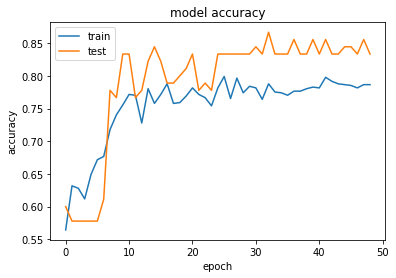

In [306]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

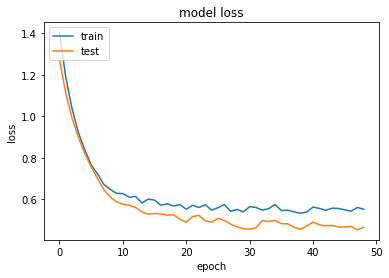

In [307]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [283]:
y_nn_mlp_train_pred = model.predict(X_train_nn_mlp)
y_nn_mlp_valid_pred = model.predict(X_valid_nn_mlp)

y_nn_mlp_train_pred = list(map(lambda x: 1 if x >= 0.5 else 0, y_nn_mlp_train_pred))
y_nn_mlp_valid_pred = list(map(lambda x: 1 if x >= 0.5 else 0, y_nn_mlp_valid_pred))

In [284]:
print('Train confusion matrix : \n',confusion_matrix(train_y,y_nn_mlp_train_pred))
print('Valid confusion matrix : \n',confusion_matrix(valid_y,y_nn_mlp_valid_pred))

print('Train accuracy : ',round(metrics.accuracy_score(train_y,y_nn_mlp_train_pred),2))
print('Valid accuracy : ',round(metrics.accuracy_score(valid_y,y_nn_mlp_valid_pred),2))

Train confusion matrix : 
 [[407  88]
 [ 68 238]]
Valid confusion matrix : 
 [[43 11]
 [ 5 31]]
Train accuracy :  0.81
Valid accuracy :  0.82


In [257]:
y_test_pred = model.predict(X_test)
predictions_test = list(map(lambda x: 1 if x >= 0.5 else 0, y_test_pred))

In [258]:
out_df = pd.concat([X_test_passenger, pd.DataFrame(predictions_test)], axis=1)
out_df.columns = ['PassengerId','Survived']
out_df.to_csv('neuralnetworks.csv', index=False)  # 0.76